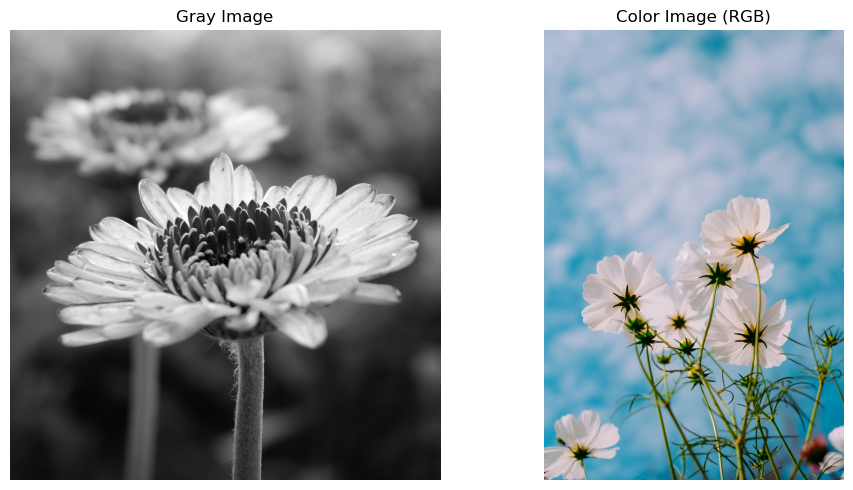

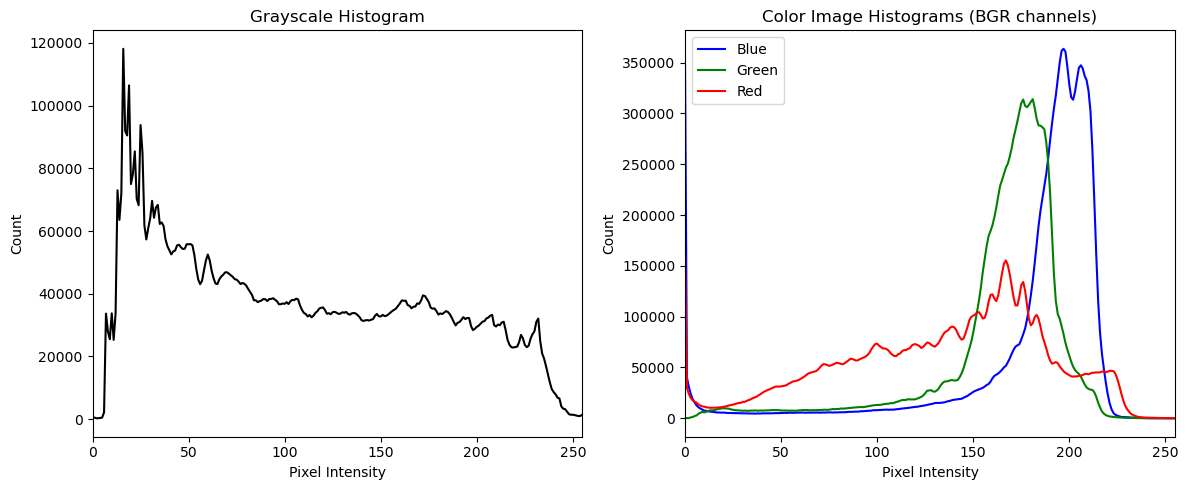

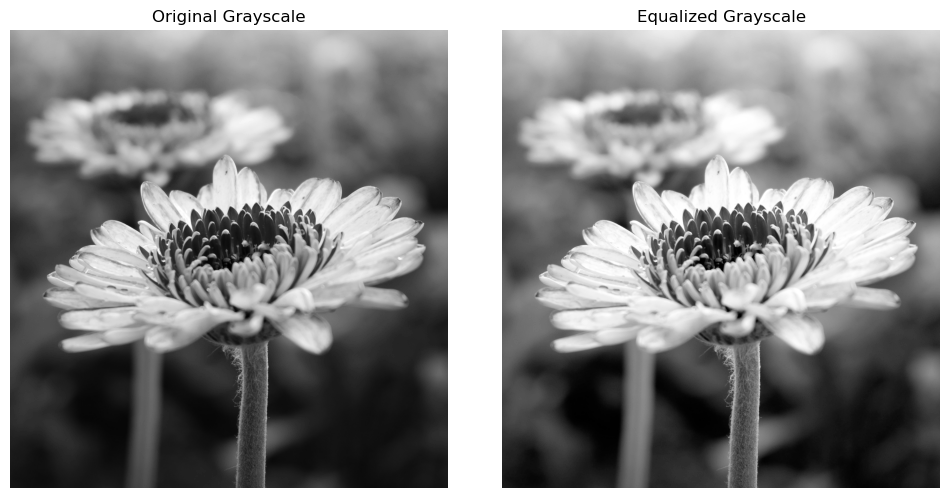

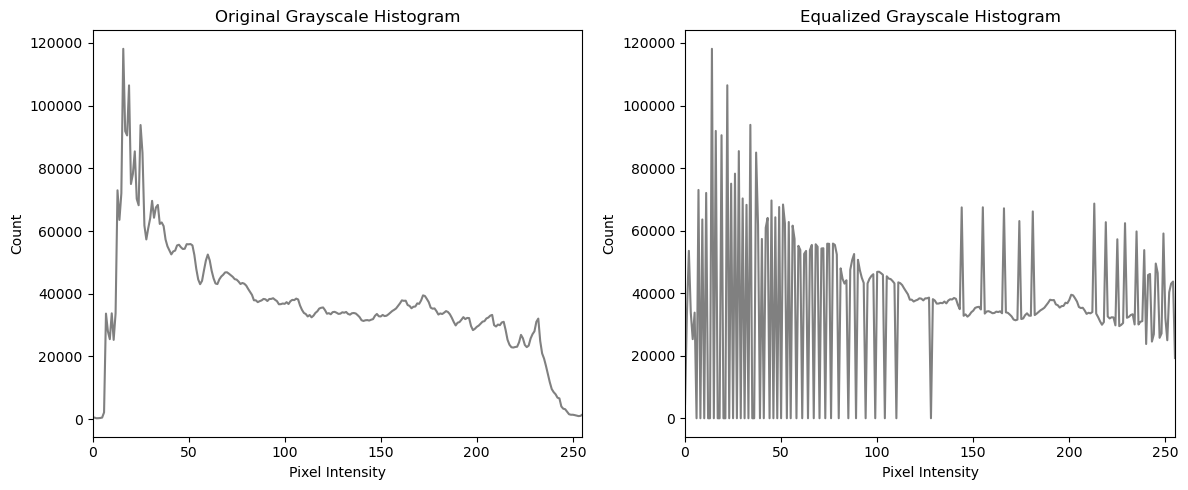

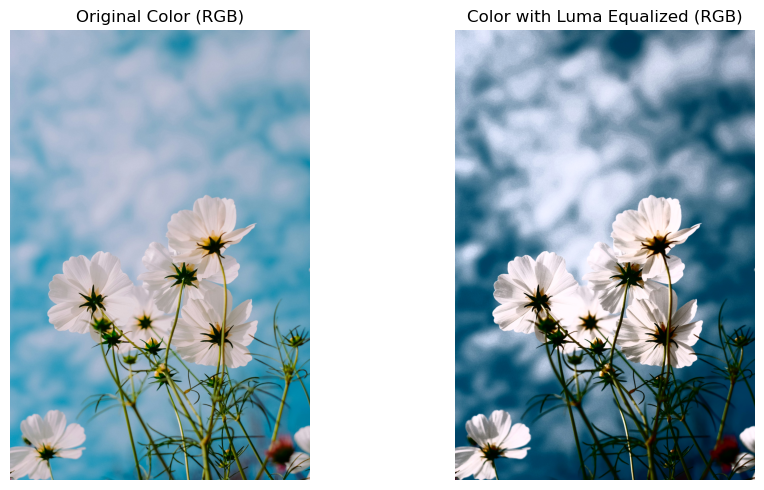

In [3]:
# Developed By: D VERGIN JENIFER
# Register Number: 212223240174
# Ex no.3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIG ---
gray_path  = "C:\\Users\\admin\\Downloads\\greyflower.jpg"
color_path = "C:\\Users\\admin\\Downloads\\flower.jpg"

# --- Load images with checks ---
gray_image  = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)
color_bgr   = cv2.imread(color_path, cv2.IMREAD_COLOR)

if gray_image is None:
    raise FileNotFoundError(f"Could not read grayscale image at: {gray_path}")
if color_bgr is None:
    raise FileNotFoundError(f"Could not read color image at: {color_path}")

# Convert for display
color_rgb = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2RGB)

# --- Display grayscale + color ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(color_rgb)
plt.title("Color Image (RGB)")
plt.axis("off")
plt.tight_layout()
plt.show()

# --- Histograms ---
# Grayscale histogram
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0,256])

# Per-channel histograms (on BGR, but we’ll label correctly)
b_hist = cv2.calcHist([color_bgr], [0], None, [256], [0,256])
g_hist = cv2.calcHist([color_bgr], [1], None, [256], [0,256])
r_hist = cv2.calcHist([color_bgr], [2], None, [256], [0,256])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist_gray, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.xlim(0,255)

plt.subplot(1,2,2)
plt.plot(b_hist, color='blue',  label='Blue')
plt.plot(g_hist, color='green', label='Green')
plt.plot(r_hist, color='red',   label='Red')
plt.title("Color Image Histograms (BGR channels)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.xlim(0,255)
plt.legend()
plt.tight_layout()
plt.show()

# --- Grayscale Equalization ---
equalized_gray = cv2.equalizeHist(gray_image)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized_gray, cmap='gray')
plt.title("Equalized Grayscale")
plt.axis("off")
plt.tight_layout()
plt.show()

hist_original = cv2.calcHist([gray_image], [0], None, [256], [0,256])
hist_equalized = cv2.calcHist([equalized_gray], [0], None, [256], [0,256])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist_original, color='gray')
plt.title("Original Grayscale Histogram")
plt.xlabel("Pixel Intensity"); plt.ylabel("Count"); plt.xlim(0,255)

plt.subplot(1,2,2)
plt.plot(hist_equalized, color='gray')
plt.title("Equalized Grayscale Histogram")
plt.xlabel("Pixel Intensity"); plt.ylabel("Count"); plt.xlim(0,255)
plt.tight_layout()
plt.show()

# --- Color Equalization (Y channel) ---
# Convert to YCrCb, equalize Y (luma), convert back
ycrcb = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y_eq = cv2.equalizeHist(y)
ycrcb_eq = cv2.merge([y_eq, cr, cb])
color_eq_bgr = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)
color_eq_rgb = cv2.cvtColor(color_eq_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(color_rgb)
plt.title("Original Color (RGB)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(color_eq_rgb)
plt.title("Color with Luma Equalized (RGB)")
plt.axis("off")
plt.tight_layout()
plt.show()

